In [7]:
import pandas as pd
import matplotlib.pyplot as plt  
import csv 
import operator 
import datetime as dt  
import matplotlib.dates as mdates
import seaborn as sns

In [2]:

df = pd.read_csv('owid-covid-data.csv',parse_dates=['date'])
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
KOR = df[df['iso_code']=='KOR']
USA = df[df['iso_code']=='USA']
JPN = df[df['iso_code']=='JPN']
CHN = df[df['iso_code']=='CHN']
ITA = df[df['iso_code']=='ITA']

C:\Users\TJ\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


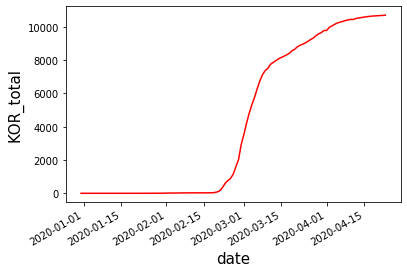

In [4]:
# 한국 총 확진자 수
fig=plt.figure()
ax=plt.subplot(111)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
datetimefmt = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(datetimefmt)

K_x = KOR['date']
K_y = KOR.iloc[:,3] 

plt.plot(K_x,K_y, color='red') 

plt.xlabel('date',size= 15)
plt.ylabel('KOR_total',size =15)
plt.show()


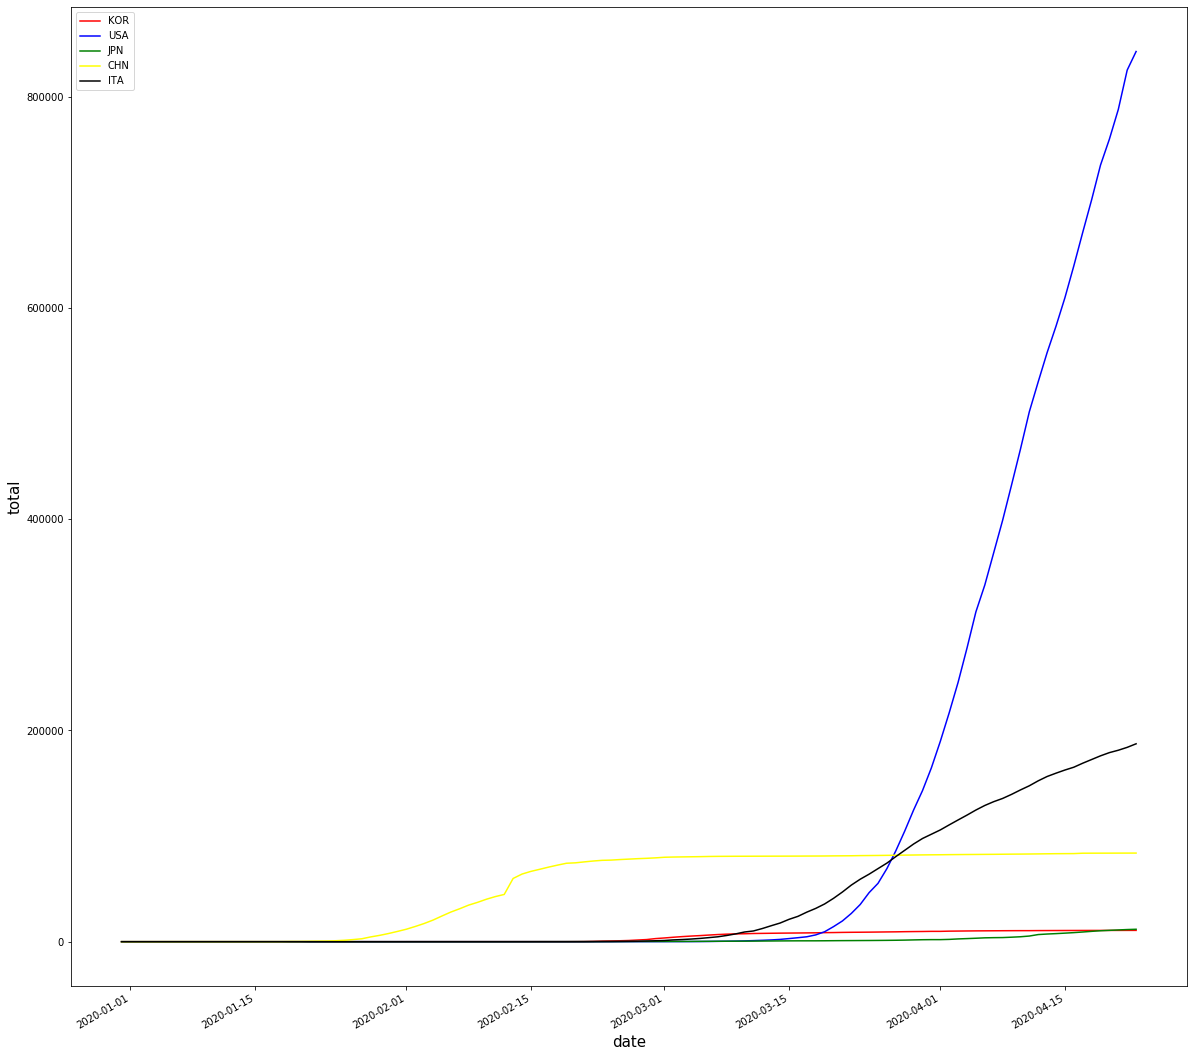

In [5]:
#한국 , 미국, 일본, 중국, 이탈리아 총 확진자수
plt.rcParams["figure.figsize"] = (20,20)
fig=plt.figure()
ax=plt.subplot(111)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
datetimefmt = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(datetimefmt)

K_x = KOR.date
K_y = KOR.iloc[:,3] 

U_x = USA.date
U_y = USA.iloc[:,3] 

J_x = JPN.date
J_y = JPN.iloc[:,3] 

C_x = CHN.date
C_y = CHN.iloc[:,3] 

I_x = ITA.date
I_y = ITA.iloc[:,3] 

plt.plot(K_x,K_y, color='red') 
plt.plot(U_x,U_y, color='blue') 
plt.plot(J_x,J_y, color='green') 
plt.plot(C_x,C_y, color='yellow') 
plt.plot(I_x,I_y, color='black') 

plt.xlabel('date',size= 15)
plt.ylabel('total',size =15)
plt.legend(['KOR',"USA","JPN",'CHN','ITA'])
plt.show()



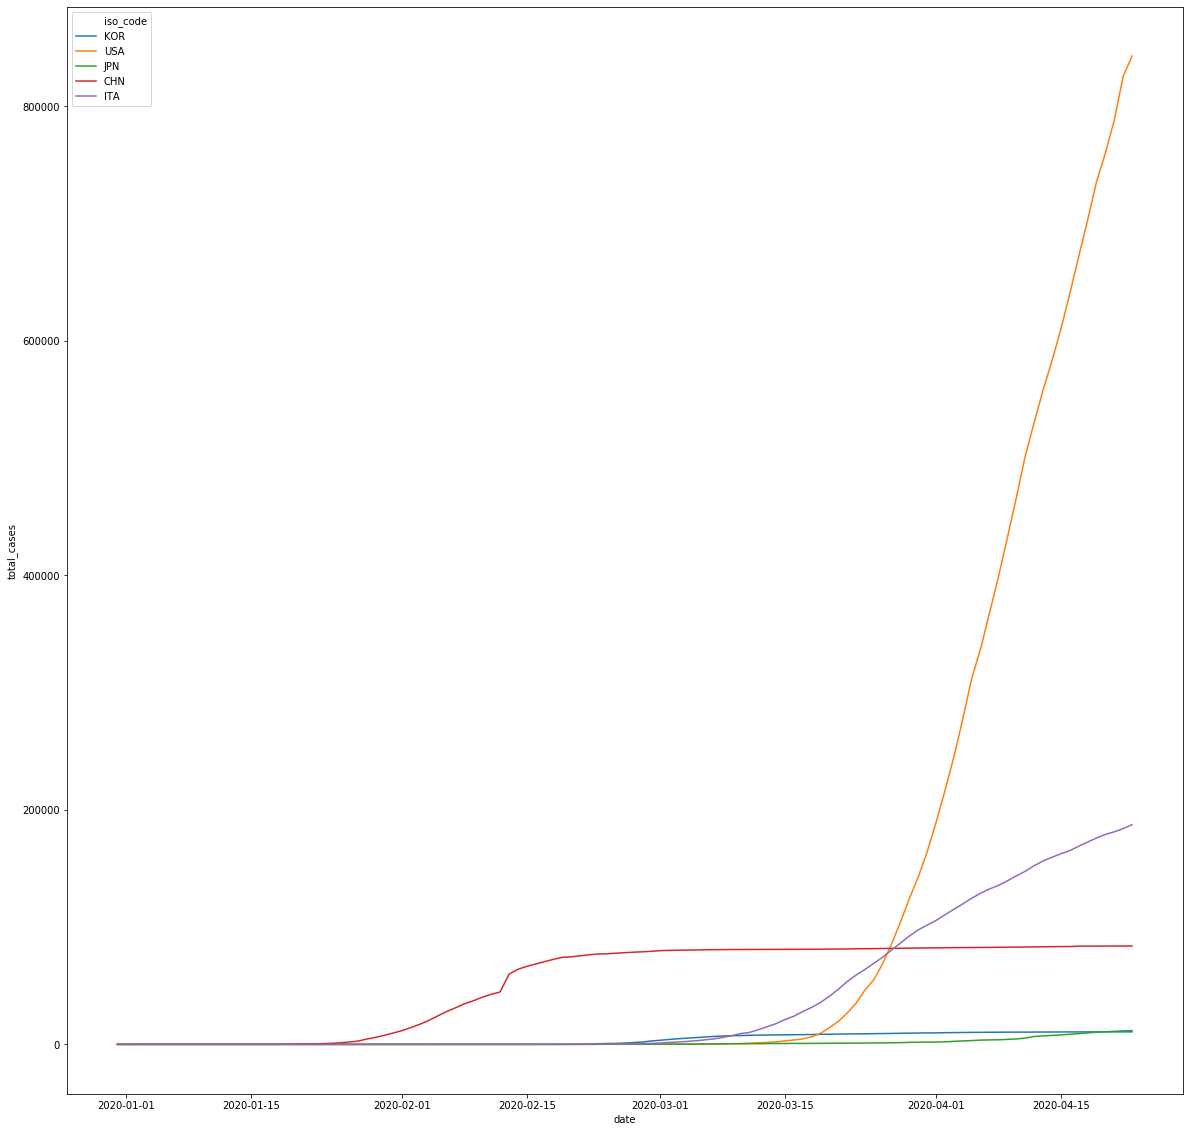

In [21]:
#위에 그래프 코드 단순화

#특정 나라만 데이터 추출
name = ['KOR','USA','JPN','CHN','ITA']
x = pd.DataFrame()
for i in name:
    x = x.append(df[df['iso_code']==i])

sns.lineplot(x='date', y='total_cases', hue='iso_code', data=x)
plt.show()

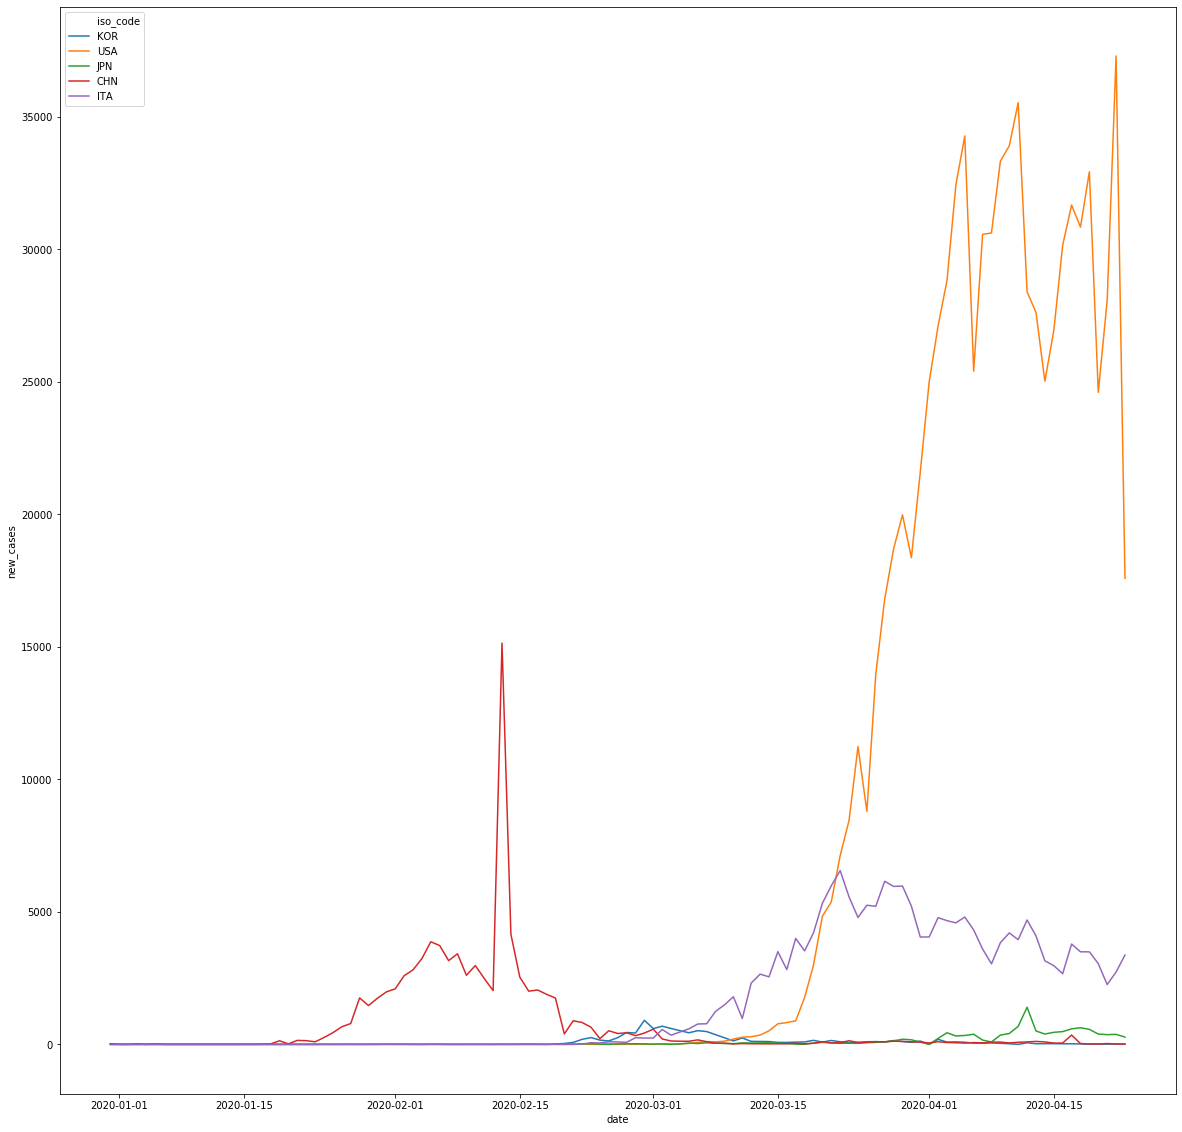

In [23]:
#날짜별 확진자 추가수 그래프
sns.lineplot(x='date', y='new_cases', hue='iso_code', data=x)
plt.show()

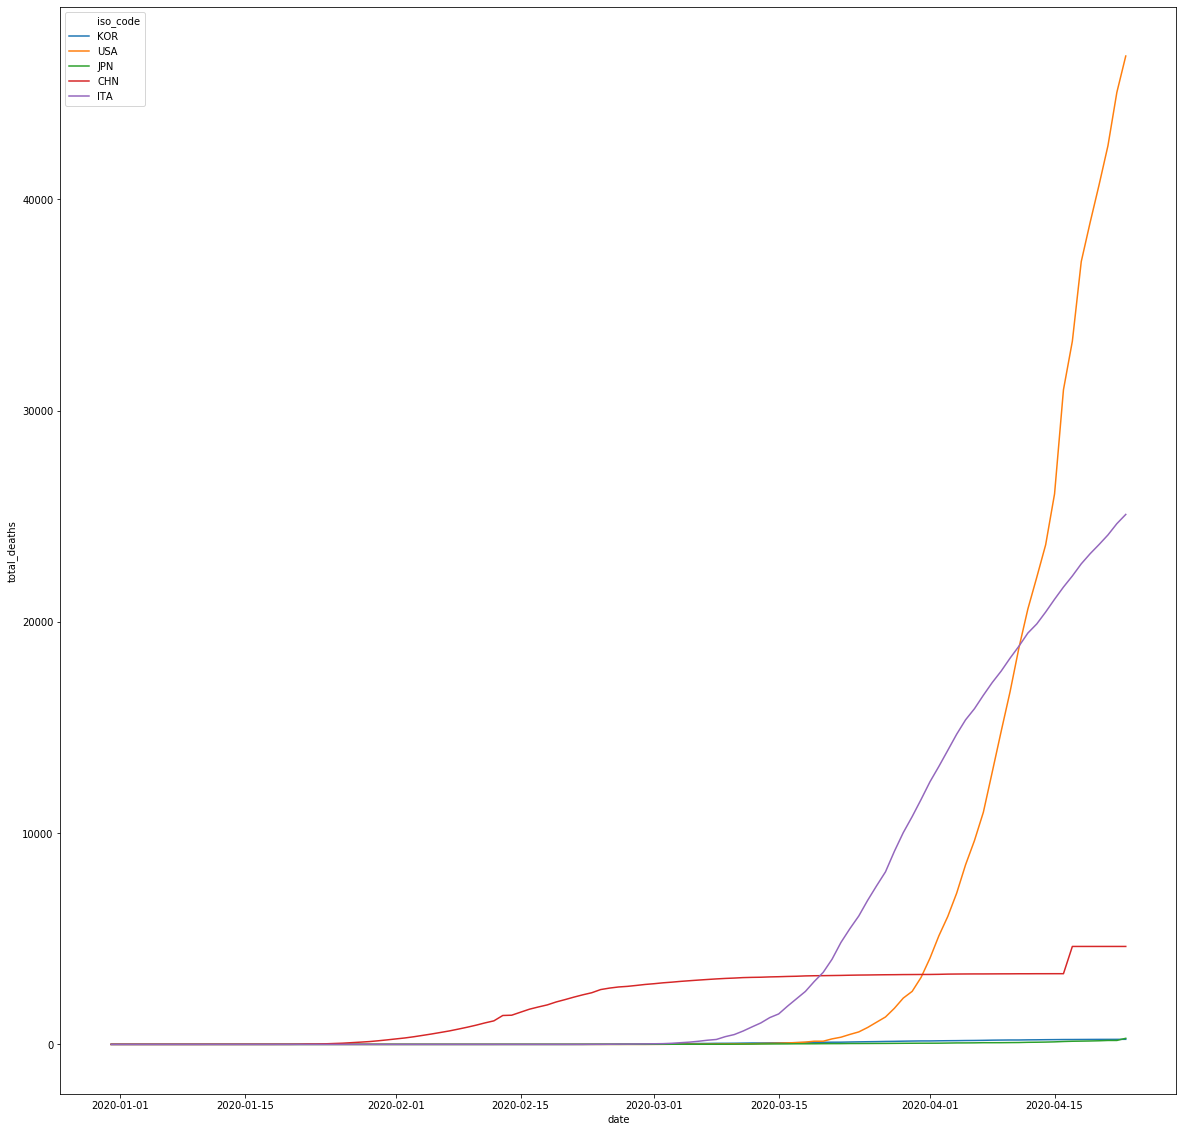

In [24]:
#날짜별 총 사망자수 그래프
sns.lineplot(x='date', y='total_deaths', hue='iso_code', data=x)
plt.show()

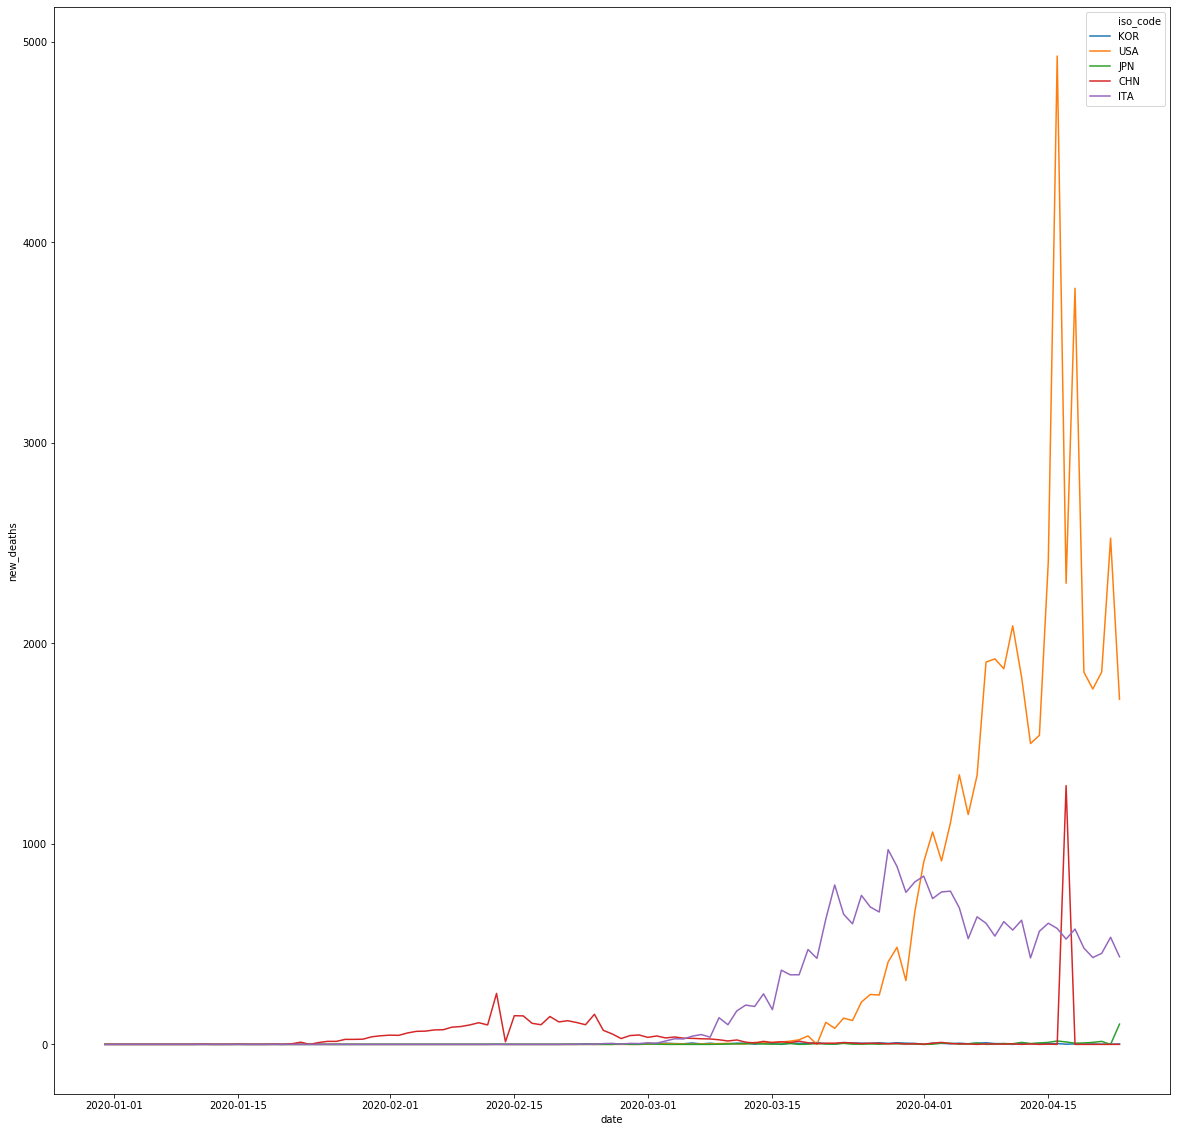

In [25]:
#날짜별 신규 사망자수 그래프
sns.lineplot(x='date', y='new_deaths', hue='iso_code', data=x)
plt.show()

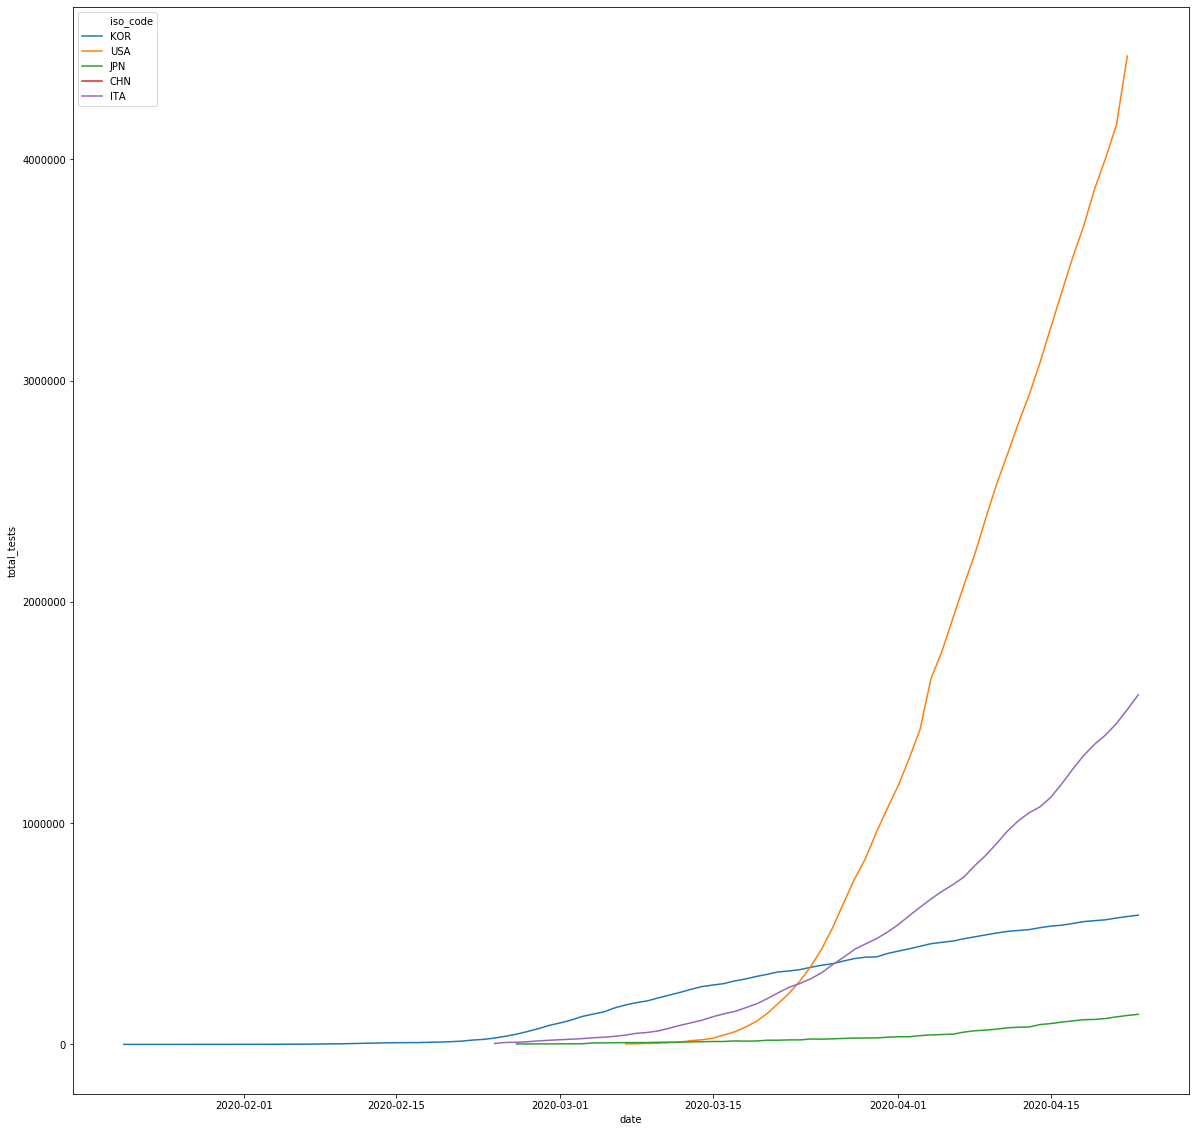

In [26]:
#날짜별 총 확진자 테스트수 그래프
sns.lineplot(x='date', y='total_tests', hue='iso_code', data=x)
plt.show()

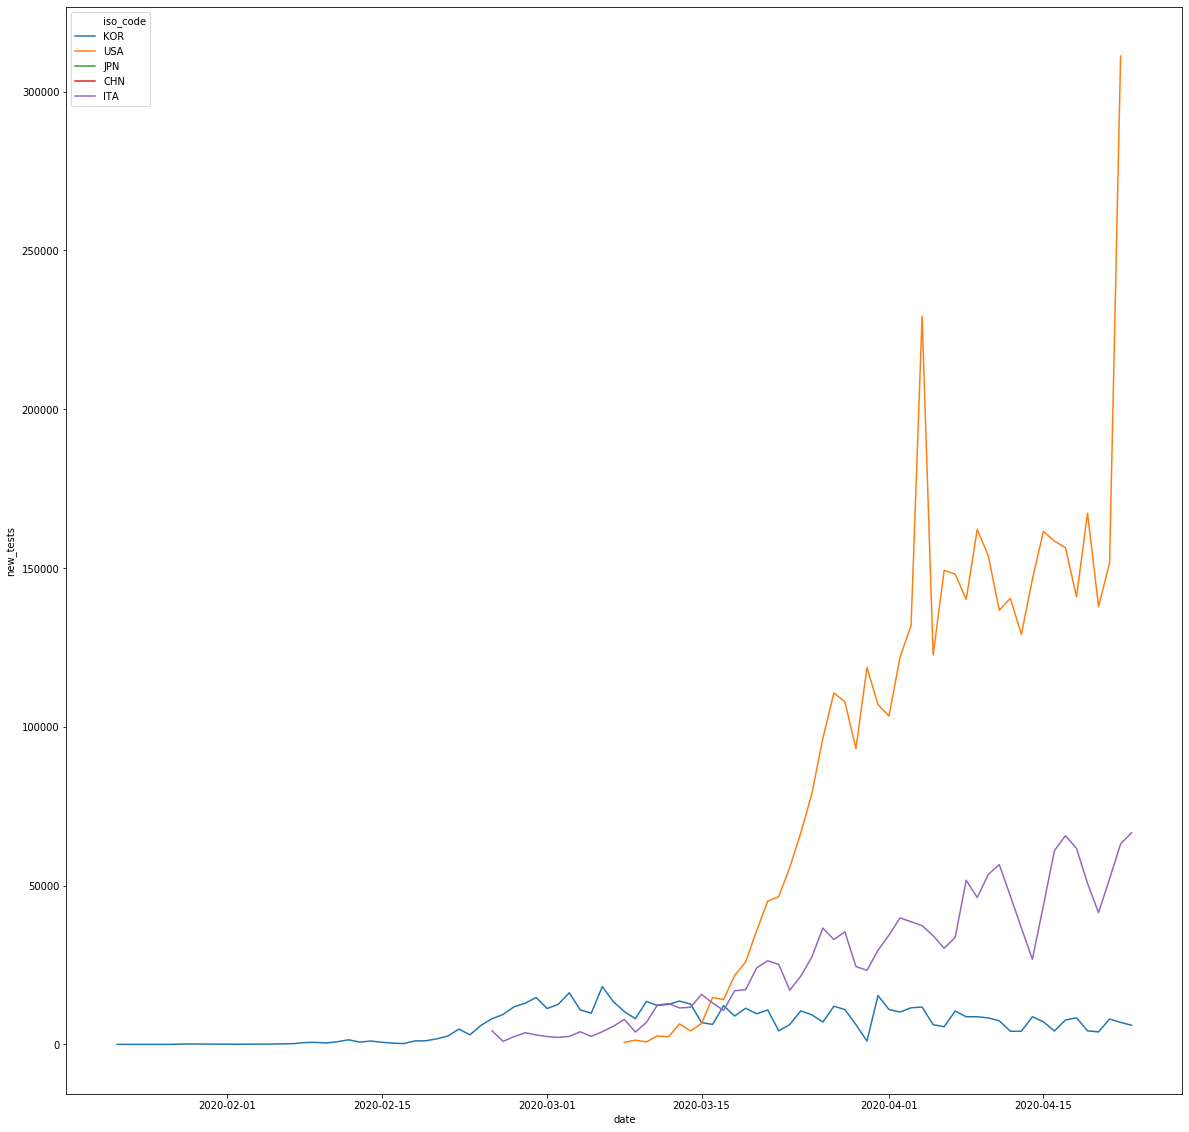

In [27]:
#날짜별 신규 확진자 테스트수 그래프
#중국과 일본은 데이터 없음
sns.lineplot(x='date', y='new_tests', hue='iso_code', data=x)
plt.show()

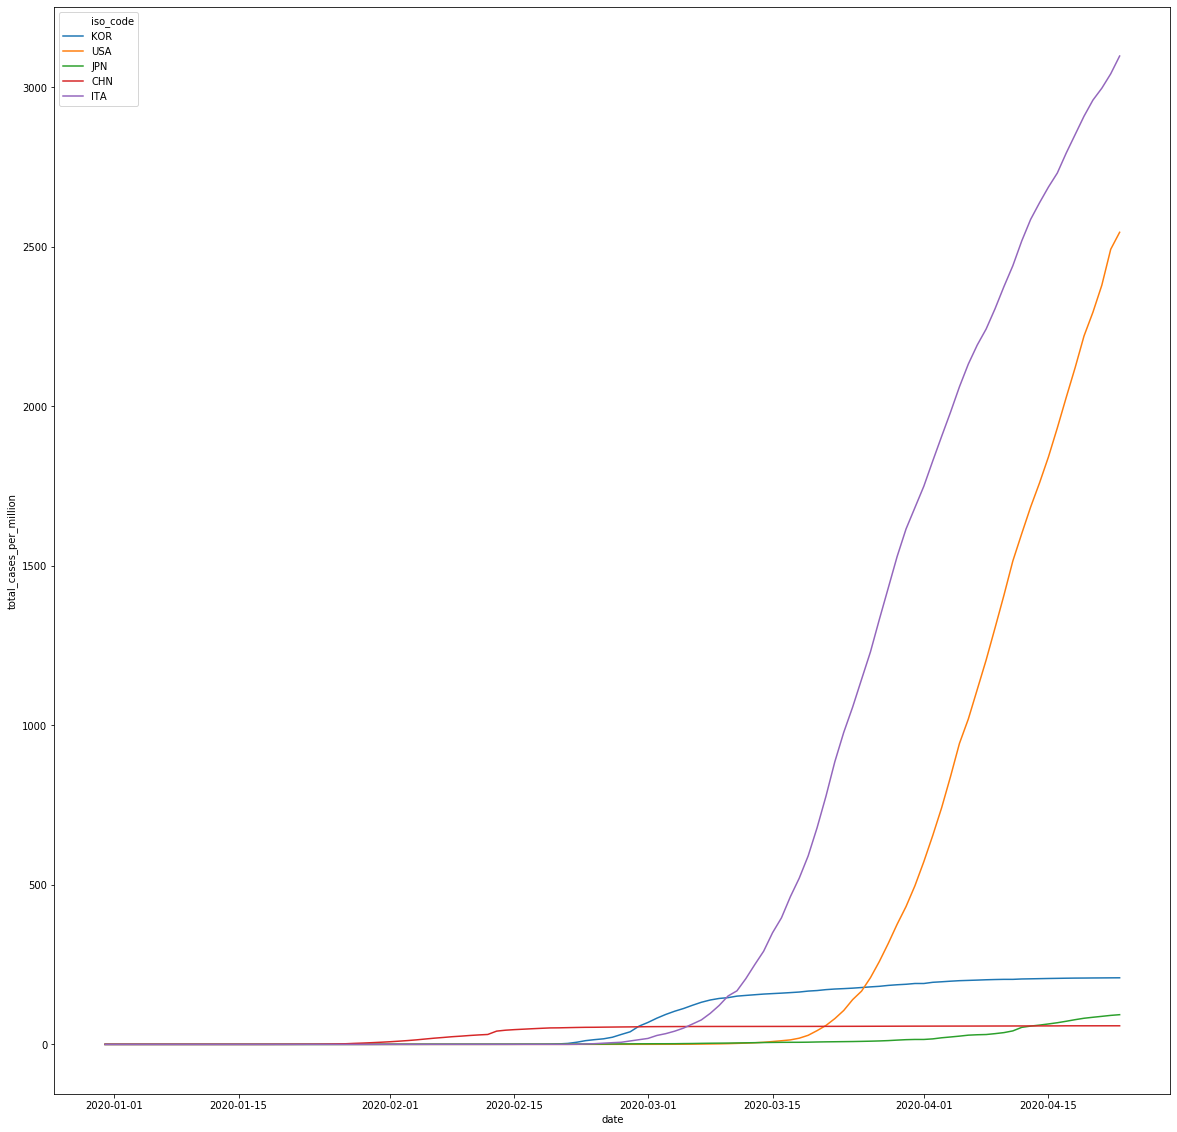

In [29]:
#날짜별 신규 백만명당 확진자수 그래프
sns.lineplot(x='date', y='total_cases_per_million', hue='iso_code', data=x)
plt.show()

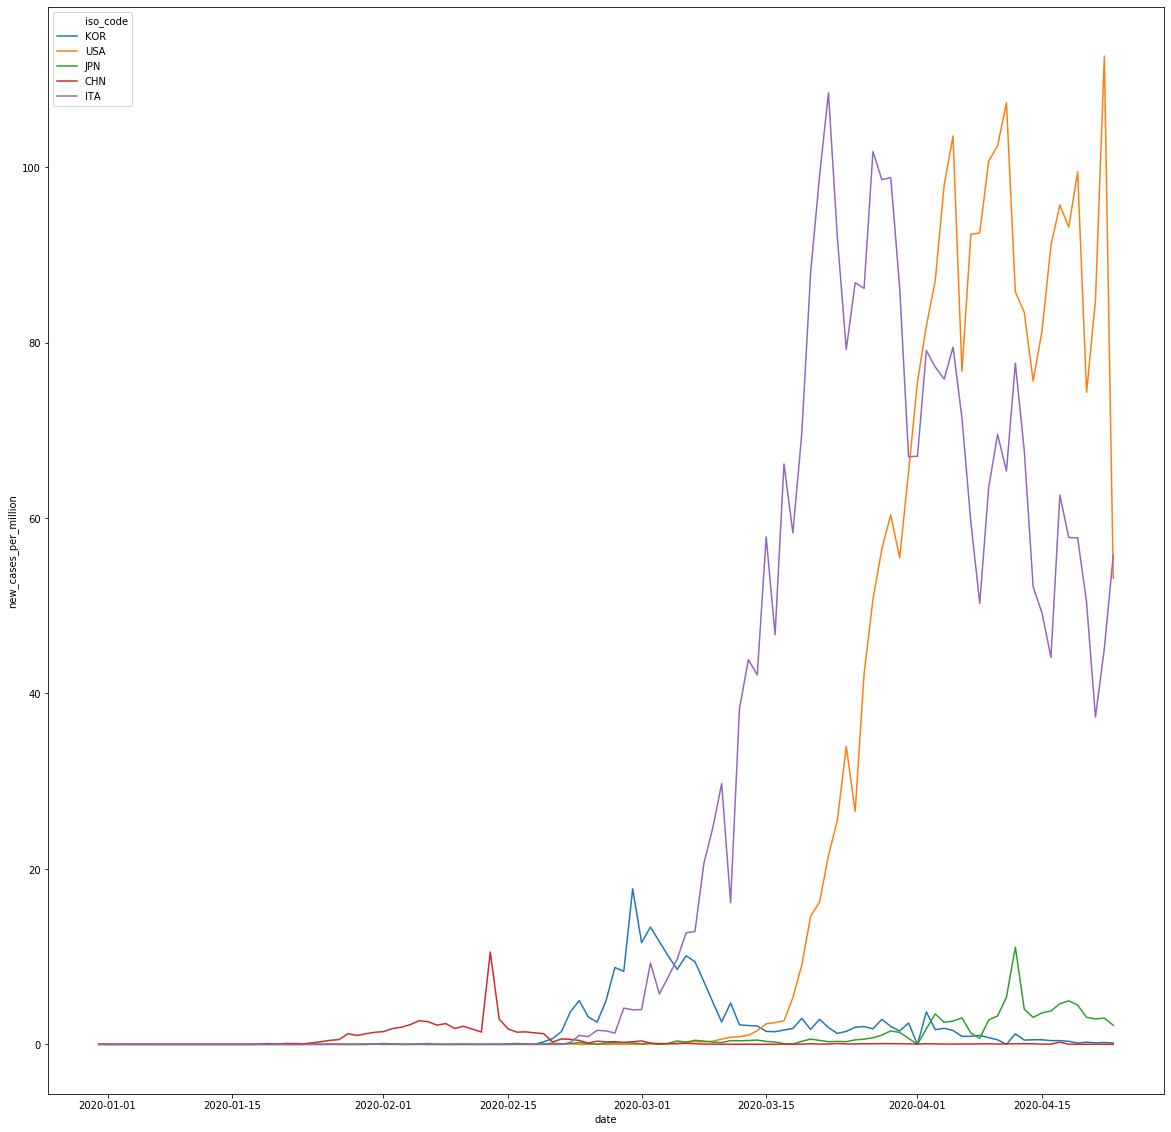

In [28]:
#날짜별 신규 백만명당 확진자수 그래프
sns.lineplot(x='date', y='new_cases_per_million', hue='iso_code', data=x)
plt.show()

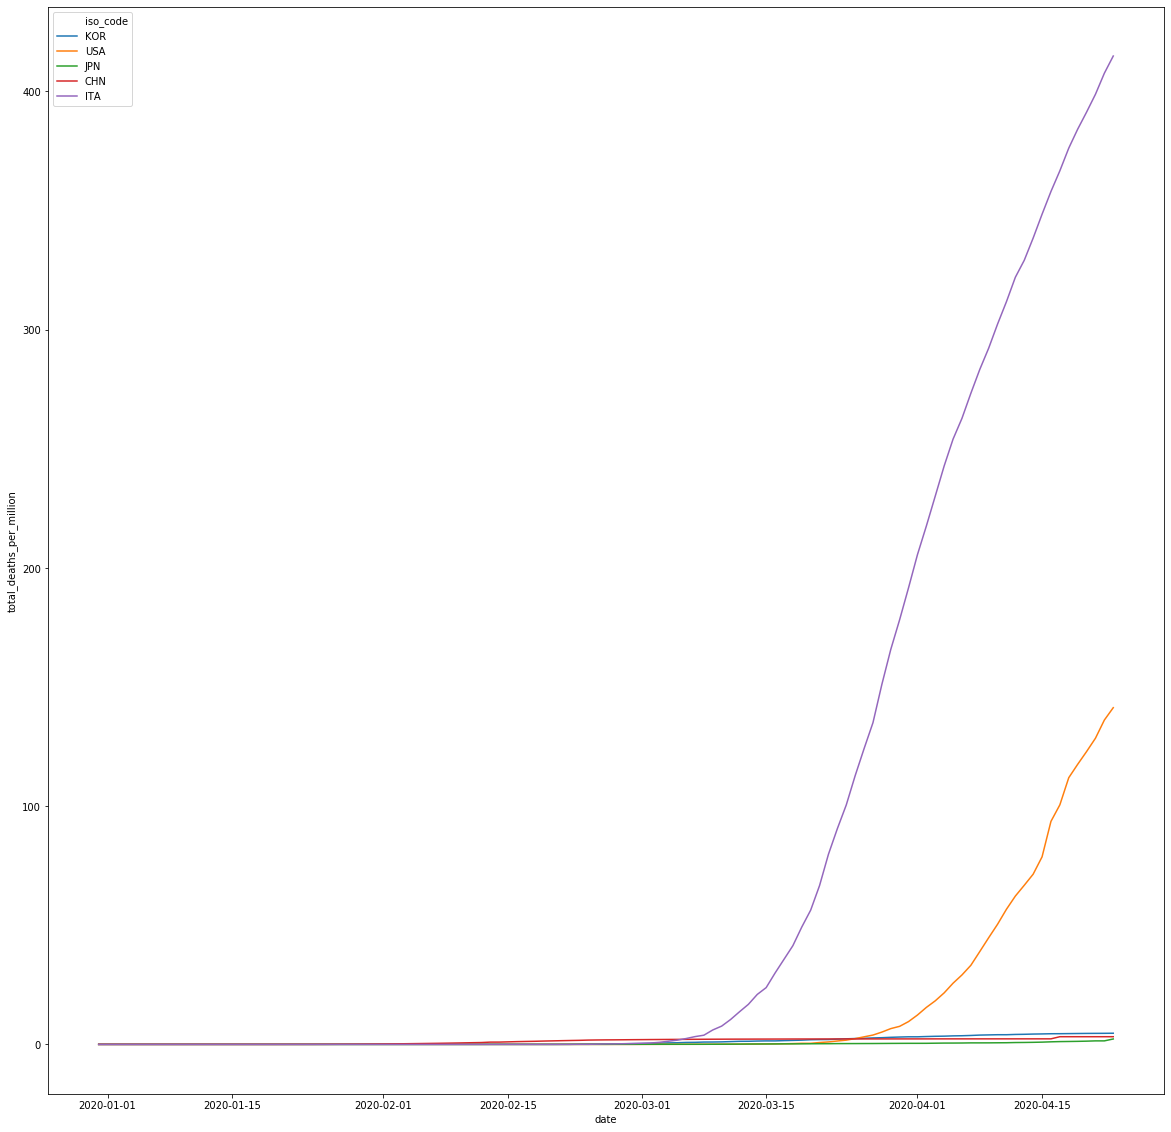

In [31]:
#날짜별 총 백만명당 사망자수 그래프
sns.lineplot(x='date', y= 'total_deaths_per_million', hue='iso_code', data=x)
plt.show()

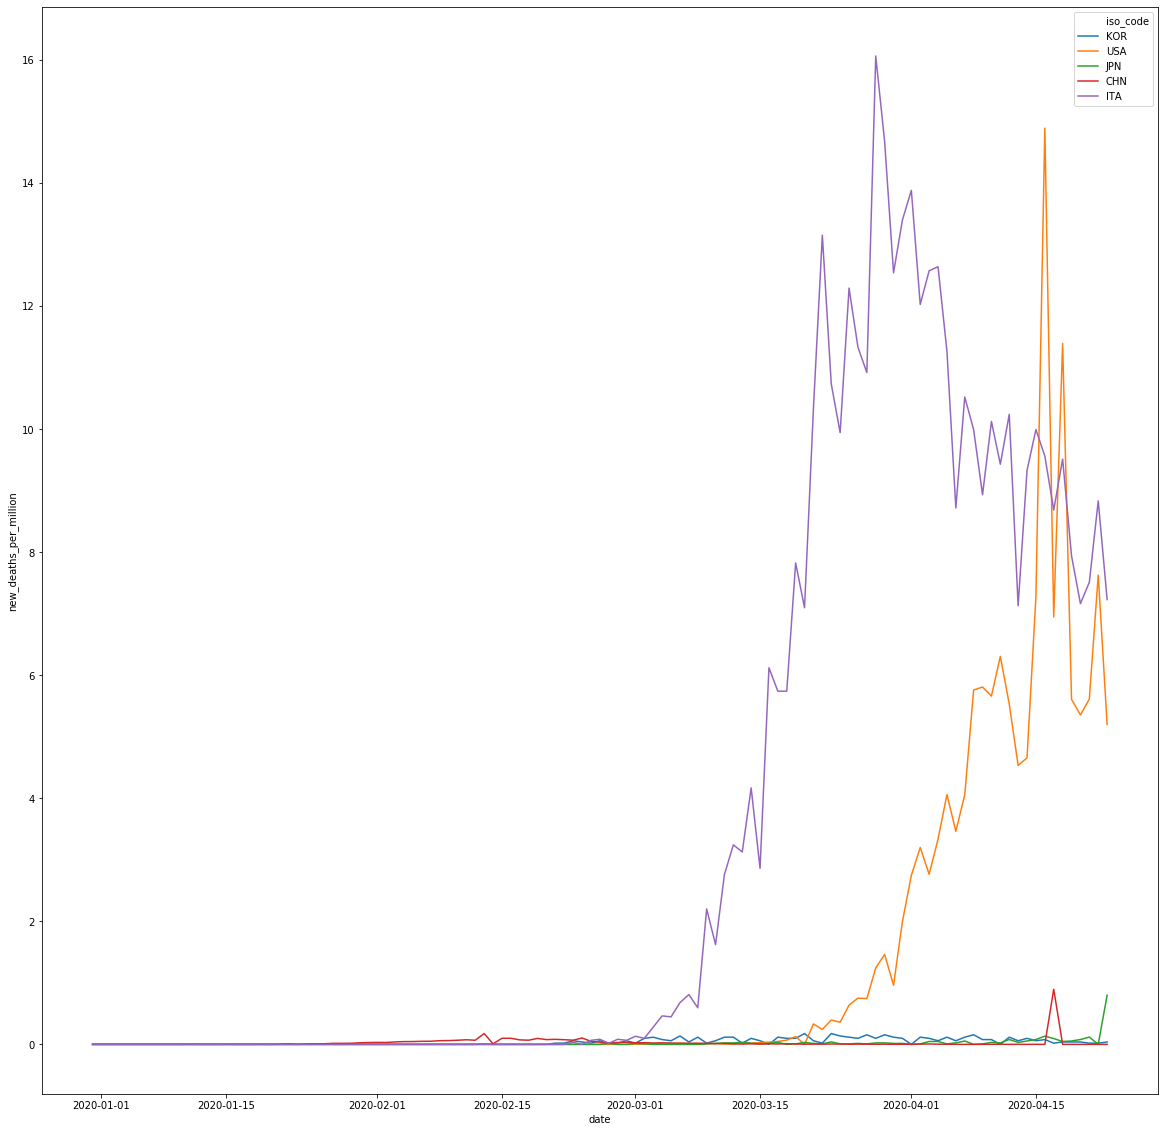

In [30]:
#날짜별 신규 백만명당 사망자수 그래프
sns.lineplot(x='date', y= 'new_deaths_per_million', hue='iso_code', data=x)
plt.show()

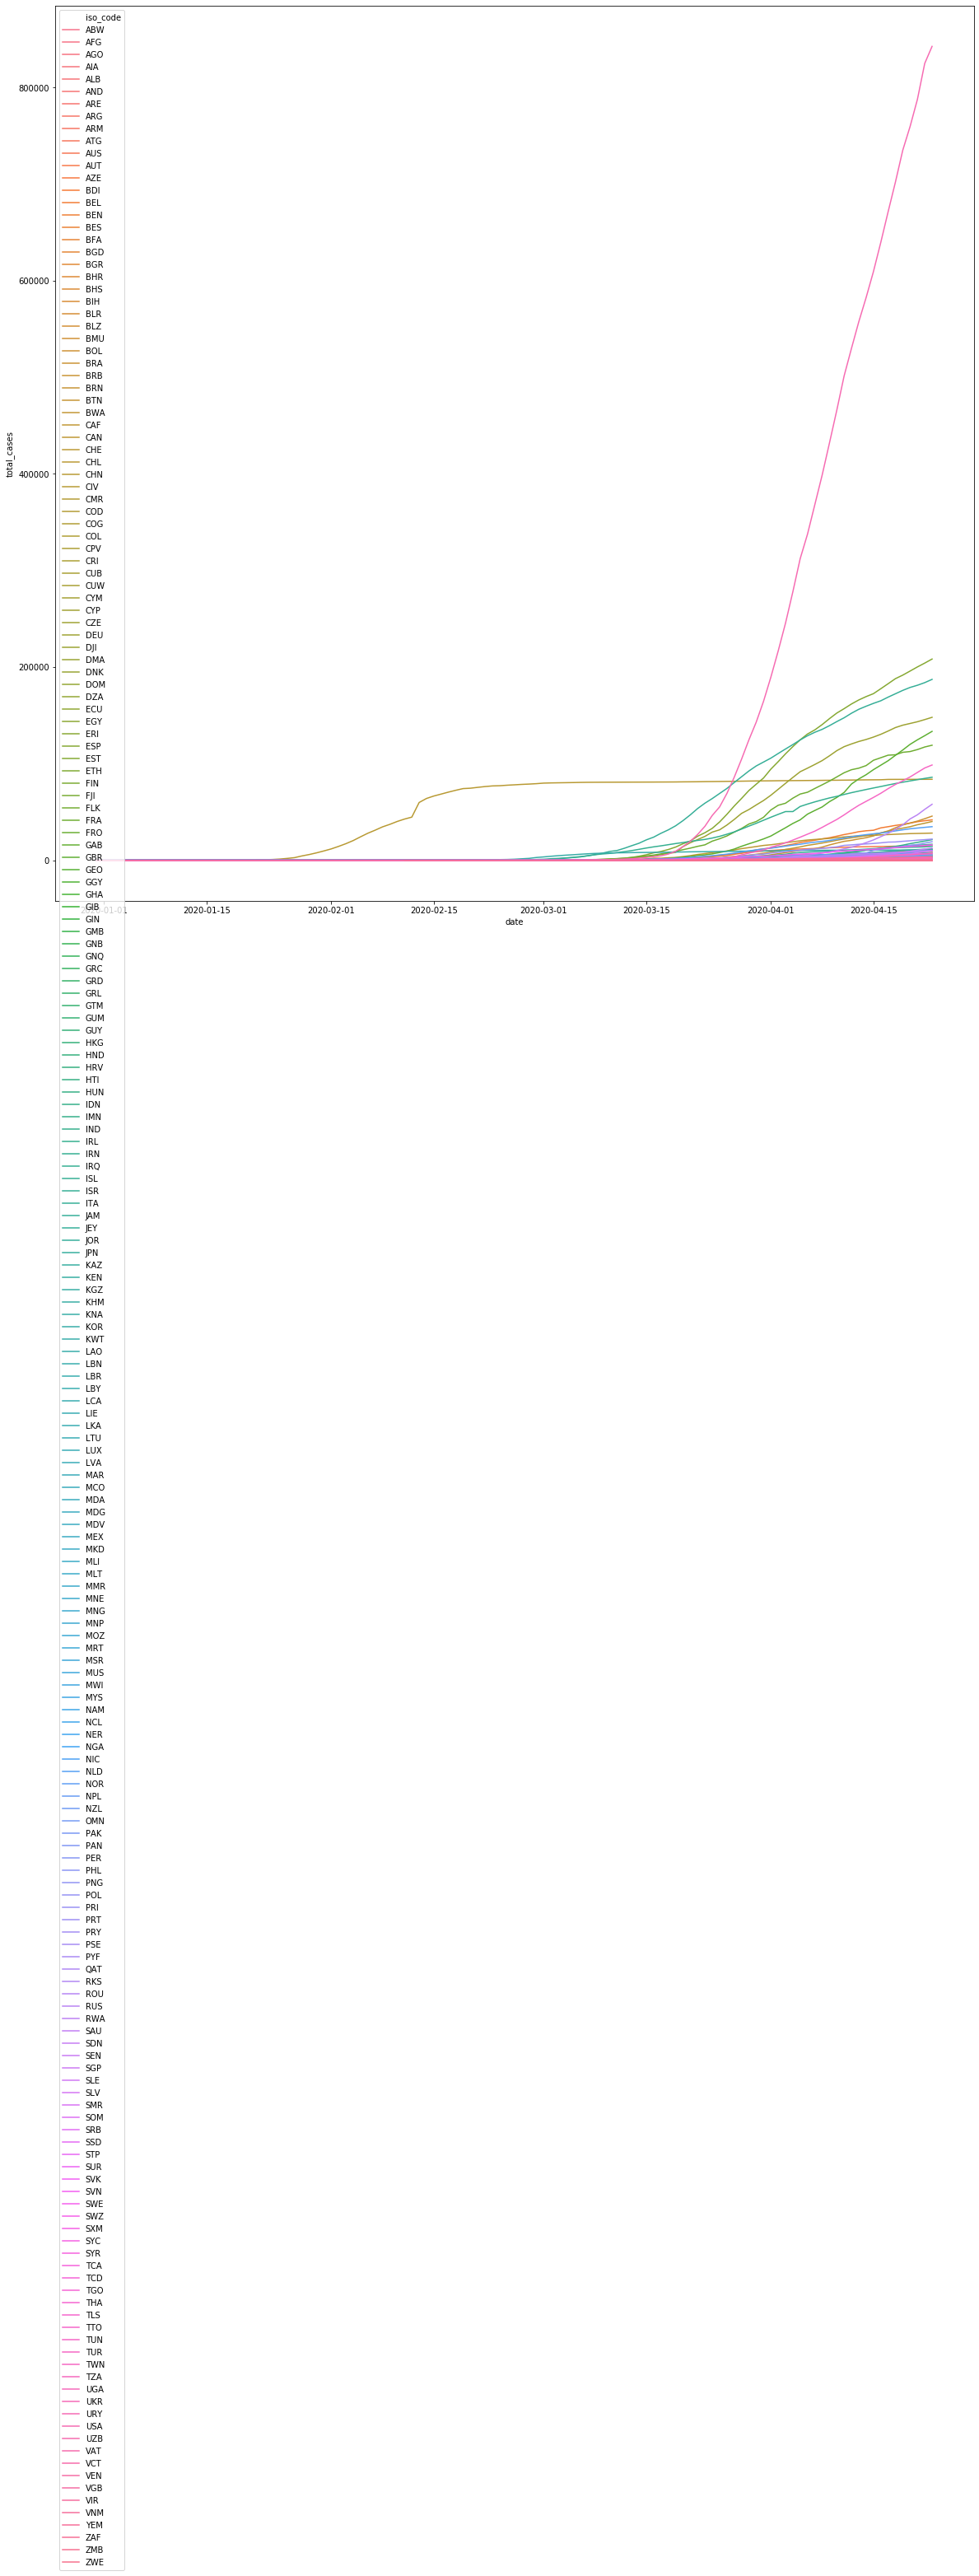

In [8]:
#각 나라별 총 확진수
sns.lineplot(x='date', y='total_cases', hue='iso_code', data=df)
plt.show()